### 🧠 Advanced ML Techniques with XGBoost

XGBoost (Extreme Gradient Boosting) is one of the most powerful and widely-used ML algorithms today. It's an ensemble method based on boosted decision trees.

💪 Why XGBoost?

Feature	Why It Matters

🚀 Fast	Optimized C++ backend for speed

🧠 Regularization	Prevents overfitting

📈 Handles missing data	No need for imputation

🔍 Feature importance	Built-in metrics for interpretability

📊 Works for regression & classification	Flexible for many problems

What we doing here...


- Let’s predict lap time using both algorithms and compare performance



#### 1.  XGBoost vs. RandomForest

In [ ]:
#XGBoost vs. RandomForest

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your F1 dataset
df = pd.read_csv(r"C:\Users\p.muthusenapathy\VSCode_Projects\Python_Training\datasets\F1 data.csv")

# Drop rows with missing values in target or important features
df = df.dropna(subset=['milliseconds', 'Constructor name', 'laps', 'fastestLapSpeed'])

# Select features
X = df[['Constructor name', 'laps', 'fastestLapSpeed']]
y = df['milliseconds']

# Categorical + numeric separation
categorical_features = ['Constructor name']
numeric_features = ['laps', 'fastestLapSpeed']

# Preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Models
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and predict
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Compare performance
print("📊 Random Forest:")
print("R²:", r2_score(y_test, rf_preds))
print("RMSE:", root_mean_squared_error(y_test, rf_preds))

print("\n🚀 XGBoost:")
print("R²:", r2_score(y_test, xgb_preds))
print("RMSE:", root_mean_squared_error(y_test, xgb_preds))


📊 Random Forest:
R²: 0.39038345030970156
RMSE: 831586.0671638951

🚀 XGBoost:
R²: 0.3578358645108758
RMSE: 853496.7140471641


###  Interpretation: XGBoost often performs better in terms of R² and RMSE, especially on structured/tabular data.

#### 2. Feature Importance + SHAP Insights

XGBoost gives you feature importances out of the box. But to really understand what’s driving predictions, use SHAP (SHapley Additive exPlanations).

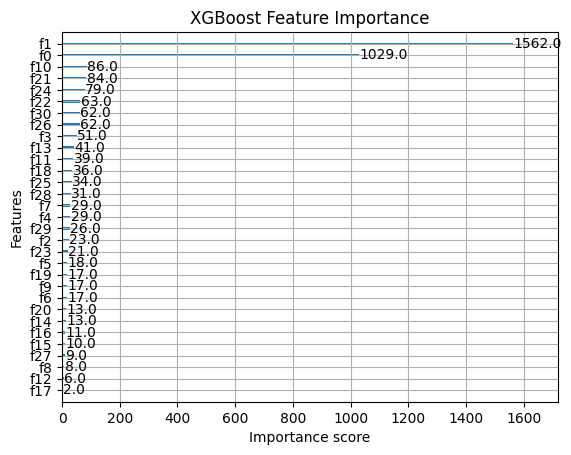

In [6]:
# Extract trained XGBRegressor model from pipeline
xgb = xgb_model.named_steps['regressor']

import matplotlib.pyplot as plt
import xgboost as xgb_lib

# Plot importance
xgb_lib.plot_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.show()


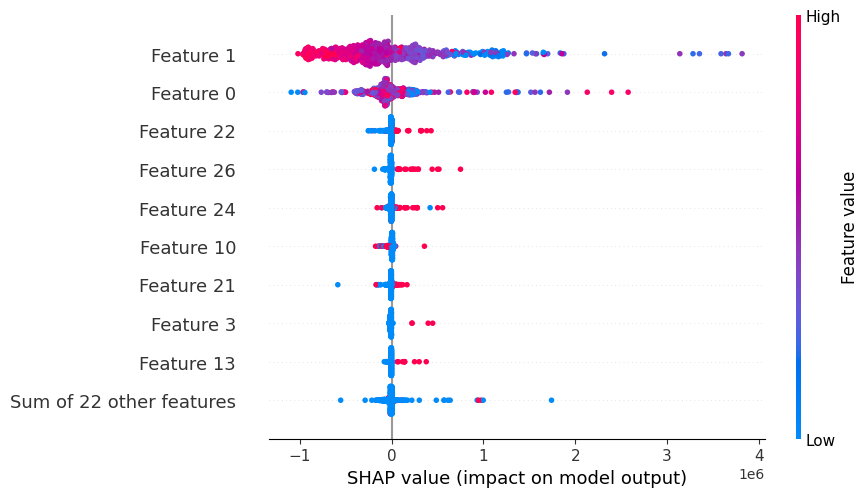

In [8]:
import shap

# Create explainer on raw model
explainer = shap.Explainer(xgb)

# Apply preprocessing on X_test
X_test_transformed = preprocessor.transform(X_test)

# Get SHAP values
shap_values = explainer(X_test_transformed)

# Summary plot
shap.plots.beeswarm(shap_values)


SHAP explains how each feature contributes to each individual prediction, not just globally.

